In [1]:
import sys
import pandas as pd
import json
import numpy as np
from helper import *
import argparse
from rsa import RSA
import matplotlib.pyplot as plt
import os

with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']

{'ref_sents': ['smallest elephant', 'baby one', 'right elep'], 'label': 22, 'bbox': [[287.8699951171875, 107.30999755859375, 306.0899963378906, 241.80999755859375]]}
/scratch2/hle/refCOCO/test/imgs_by_id/353175.jpg


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,trunk-1,353175,583473,19637,0.015552,279.890381,240.841660,37.078827,114.620407,0.000624,...,0.002502,0.002492,0.002500,0.002492,0.002492,0.002492,0.002499,0.002496,0.002492,0.002492
1,elephant-1,353175,583473,19637,0.310084,315.154907,98.047455,319.893188,264.899811,0.000624,...,0.002494,0.002493,0.002529,0.002493,0.002494,0.002493,0.002495,0.002495,0.002493,0.002495
2,ear-1,353175,583473,19637,0.033336,340.958435,132.513657,81.162048,112.246216,0.000624,...,0.002494,0.002493,0.002513,0.002493,0.002493,0.002493,0.002497,0.002495,0.002493,0.002493
3,ear-2,353175,583473,19637,0.046325,92.186607,70.042000,108.230858,116.969383,0.000624,...,0.002494,0.002493,0.002513,0.002493,0.002493,0.002493,0.002496,0.002495,0.002493,0.002493
4,trunk-2,353175,583473,19637,0.053385,42.490498,108.129120,63.675495,229.114288,0.000624,...,0.002504,0.002492,0.002523,0.002492,0.002492,0.002492,0.002502,0.002498,0.002492,0.002494
5,elephant-2,353175,583473,19637,0.336217,1.492764,58.172756,311.778229,294.701141,0.000624,...,0.002495,0.002493,0.002525,0.002493,0.002494,0.002493,0.002495,0.002496,0.002493,0.002495
6,ground-1,353175,583473,19637,0.295663,0.000000,168.864944,319.855865,252.610245,0.000624,...,0.002495,0.002494,0.002500,0.002494,0.002494,0.002494,0.002494,0.002496,0.002494,0.002494
7,tree-1,353175,583473,19637,0.204848,1.966352,0.000000,185.462936,301.844604,0.000624,...,0.002504,0.002494,0.002501,0.002494,0.002494,0.002494,0.002495,0.002504,0.002494,0.002499
8,water-1,353175,583473,19637,0.084039,1.658446,359.902954,347.651520,66.060608,0.000624,...,0.002496,0.002494,0.002494,0.002495,0.002494,0.002495,0.002495,0.002495,0.002494,0.002494
9,ground-2,353175,583473,19637,0.216862,320.596527,237.289536,319.403473,185.545761,0.000624,...,0.002494,0.002493,0.002494,0.002494,0.002494,0.002493,0.002494,0.002495,0.002493,0.002493


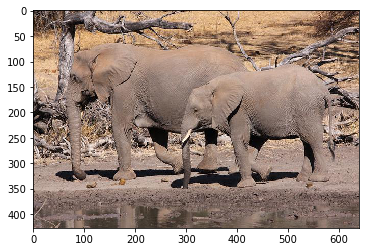

In [20]:
file_id = 8#4103#1784#137#67#21540#3278#182

df = pd.read_csv(os.path.join(data_path,f'refCOCO/test/attr_tables_with_target_box/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
# df = pd.read_csv(os.path.join(data_path,f'refCOCO/test/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
with open(os.path.join(data_path,f'refCOCO/test/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
refs = [[r] for r in label['ref_sents']]
print(label)
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/test/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
df

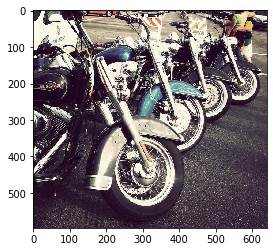

In [5]:
plt.imshow(image)

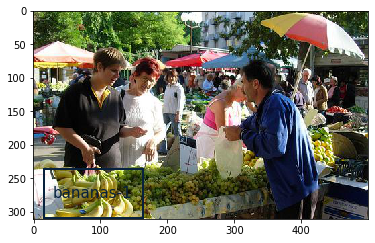

In [11]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
rng = [i for i in range(len(box_data))]
for i in [4]:#rng[:]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax = draw_box_obj(name,x,y,w,h,img,ax)

['woman wearing black polo', 'woman left']


(<matplotlib.axes._subplots.AxesSubplot at 0x7f185c7194d0>,
 array([0.59613648, 0.10941626, 0.38805584]))

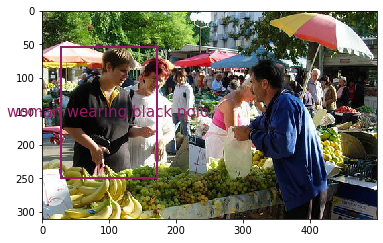

In [12]:
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)

In [13]:
matched_label = np.load('test_imgs_label_matching.npy', allow_pickle=True)
matched_label = np.load('test_imgs_label_matching_with_true_target.npy', allow_pickle=True)
rel_load = np.load(f'./test_relation_extraction.npy', allow_pickle=True)
generated_relation = rel_load[file_id]
rsa_agent = RSA(df,generated_relations=generated_relation)
#targets = [matched_label[file_id][j][1] for j in range(min(3, len(matched_label[file_id])))]

# word_lists = [rsa_agent.full_speaker(target) for target in targets]

# expression = [' '.join(word_lists[j][::-1]) for j in range(len(word_lists))]

In [17]:
matched_label[14]

[[34, 'pants-2', 0.9999999399165705],
 [0, 'pants-1', 0.5069132550578578],
 [29, 'batter-1', 0.367102357257729],
 [23, 'stripe-1', 0.35349696276810344],
 [20, 'player-1', 0.3509262072013459]]

In [14]:
# the top 3 guesses based on top 3 best match
# print(targets)
# print(expression)

# def full_speaker(self, obj):
#         output = []
#         prior = self.objectPrior()
#         t = ''
#         print('HELLOSDFDSF')
#         for iter in range(10):
#             # print('iteration',iter)
#             print('prior:', prior)
#             utts,pro, utterance_type = self.speaker(obj, prior, t, output) 
#             #print(iter, prior)
#             if len(utts) > 0:
#                 idx=np.argmax(pro)
#                 # print("YOYO",utts[idx])
#             if pro[idx] <= 0:
#                 new_c = prior
#             else:
#                 u = utts[idx]
#                 new_c = self.literal_listener(u,prior, utterance_type)
#                 output.append(u)
#             ent = self.entropy(new_c)
#             # print(iter,'new_c',new_c)
#             # print(iter,'ent',ent)
#             prior = new_c
#             t = output[0]
#             if ent <= BOUND:
#                 break
#         return output
# rsa_agent.full_speaker = full_speaker

In [5]:
rsa_agent.full_speaker('fence-1')

/scratch2/hle/git/rsa_refer/rsa.py:137: RuntimeWarning: invalid value encountered in true_divide
  return result/np.sum(result)


(['fence'], False)

In [6]:
rsa_agent.full_speaker('man-1')

/scratch2/hle/git/rsa_refer/rsa.py:137: RuntimeWarning: invalid value encountered in true_divide
  return result/np.sum(result)


(['bald'], True)

In [10]:
rsa_agent.obj_to_types

defaultdict(dict,
            {'fence-1': {'OOV': 1, 'fence': 1},
             'field-1': {'OOV': 1, 'field': 1, 'grass': 1},
             'grass-1': {'field': 1, 'grass': 1},
             'horse-1': {'horse': 1, 'statue': 1},
             'jacket-1': {'jacket': 1, 'shirt': 1},
             'leaves-1': {'OOV': 1, 'leaves': 1, 'tree': 1},
             'shirt-1': {'jacket': 1, 'shirt': 1},
             'sky-1': {'sky': 1},
             'statue-1': {'horse': 1, 'statue': 1},
             'tree-1': {'tree': 1},
             'tree-2': {'tree': 1},
             'trees-1': {'tree': 1, 'trees': 1}})

In [11]:
df['TYPE_man']

0     0.000624
1     0.000624
2     0.000624
3     0.000629
4     0.000627
5     0.000627
6     0.000638
7     0.000625
8     0.000668
9     0.000630
10    0.000630
11    0.000624
12    0.000698
Name: TYPE_man, dtype: float64

In [15]:
man_1 = df.iloc[12]

In [16]:
man_1

box_alias                     man-1
image_id                     167712
ann_id                       274052
ref_id                        35662
salience                  0.0532369
x1                              426
y1                           176.81
w                            102.21
h                            142.34
TYPE_yolk               0.000624211
TYPE_goal               0.000624217
TYPE_bathroom           0.000624211
TYPE_macaroni           0.000624212
TYPE_umpire             0.000624268
TYPE_toothpick           0.00062421
TYPE_alarm_clock         0.00062421
TYPE_ceiling_fan         0.00062421
TYPE_photos              0.00062421
TYPE_parrot             0.000624311
TYPE_tail_fin           0.000624212
TYPE_birthday_cake      0.000624211
TYPE_calculator         0.000624209
TYPE_catcher            0.000624234
TYPE_toilet             0.000624388
TYPE_batter             0.000624242
TYPE_stop_sign          0.000624239
TYPE_cone                0.00062424
TYPE_microwave          0.00

In [25]:
man_1.columns

AttributeError: 'Series' object has no attribute 'columns'

In [28]:
cols = df.columns

In [30]:
types = [man_1[col] for col in cols if 'TYPE_' in col]

In [32]:
max(types)

0.0006984500796534121

In [34]:
types.count(0.0006984500796534121)

1